In [11]:
!pip install mtcnn

  Using cached mtcnn-0.1.1-py3-none-any.whl.metadata (5.8 kB)
Using cached mtcnn-0.1.1-py3-none-any.whl (2.3 MB)


In [3]:
import cv2

2024-03-15 19:24:44.786025: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
# from tqdm.notebook import tqdm

In [1]:
from mtcnn import MTCNN

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-03-15 19:26:50.244898: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# import torch 

: 

In [4]:
model = MTCNN()

In [16]:
model

In [28]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    faces = model.detect_faces(frame)
    for face in faces:
        x, y, w, h = face['box']
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.imshow('MTCNN', frame) #I think frame is the actual photo
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break 
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 24ms/step


In [29]:
cap.release()
cv2.destroyAllWindows()

In [162]:
#NMS 
# probs = model(img)[0].boxes.conf
# boxes = model(img)[0].boxes.xyxy #bl, tr 

def checkWithin(box1, box2):
    print('error here? ', len(box1), len(box2))
    bl_y = max(box1[1], box2[1])
    bl_x = max(box1[0], box2[0])
    tr_y = min(box1[3], box2[3])
    tr_x = min(box1[2], box2[2])
    print('ereached here? ', len(box1), len(box2))

    intersection = max((tr_y - bl_y), 0)  * max((tr_x - bl_x),0)
    union = (box1[3] - box1[1]) * (box1[2] - box1[0]) + (box2[3] - box2[1]) * (box2[2] - box2[0]) - max(0, intersection)
    print('intersection', intersection, 'union', union)
    return (intersection / union) > 0.5

def get_next_max(seen, confidence):
    max = -1
    for i in range(len(confidence)):
        if (i in seen):
            continue
        else:
            max = i if confidence[i] > max else max
    return max



def nms(result, get_max=None, seen=set()):
    if (not result.boxes):
        return result
    boxes = result.boxes.xyxy if result.boxes is not None  and result.boxes.xyxy is not None else None
    confidence = result.boxes.conf
    prob_max = get_max if get_max else np.argmax(np.array(confidence))
    i = 0 
    print('initial lenght', len(boxes))
    while (i < len(boxes)):
        if i == prob_max or i in seen:
            i+=1
            continue 
        # print('indices HEREEEE', len(boxes), len(confidence), i)
        if (checkWithin(boxes[i], boxes[prob_max])):
            
            if (i != len(boxes)):
                boxes = torch.cat([boxes[:i], boxes[i+1:]]) 
                confidence = torch.cat([confidence[:i], confidence[i+1:]])
            else:
                boxes = boxes[:i]
                confidence =confidence[:i]
            prob_max = np.argmax(np.array(confidence))
            # result.boxes.xyxy = boxes
            # result.boxes.conf = confidence
            i -= 1
            print('Confidence score: ', confidence[i], '\n Checking result ', result.boxes.xyxy, '\n Checking confidence', result.boxes.conf, '\n checking pass by ref confidence',  confidence)
        i += 1
    # seen = set() if not seen else seen
    seen.add(prob_max)
    get_max = get_next_max(seen, confidence)
    if (get_max == -1):
        return result
    else:
        print(get_max, seen)
        return nms(result, get_max, seen)

# result = model(img).copy()[0]
# nms(result)

1/1 [==============================] - 0s 72ms/step
2


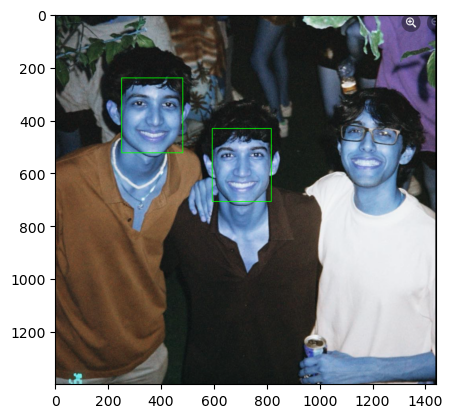

In [10]:
%matplotlib inline
def read_file_display(file):
    image = cv2.imread(file)
    faces = model.detect_faces(image)
    print(len(faces))
    for face in faces:
        x,y,w,h = face['box']
        # print()
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
    plt.imshow(image)
    plt.show()
read_file_display('patels.png')

In [166]:
# a,b = [1,2]
# print(a,b)

1 2


1/1 [==============================] - 0s 55ms/step
[251, 241, 231, 283]
[593, 432, 223, 276]


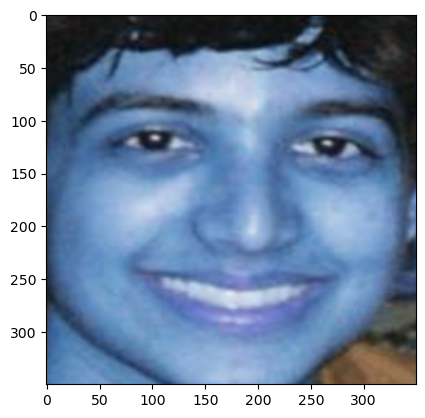

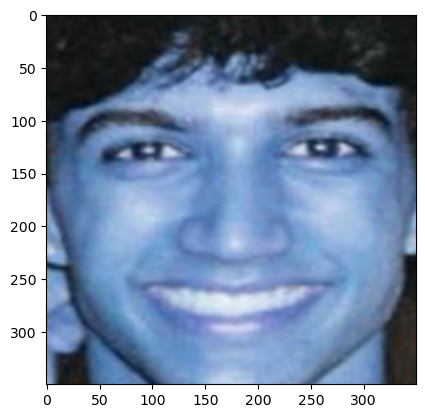

In [14]:
%matplotlib inline
def crop_images(image, boxes):
    images_cropped = [] 
    for box in boxes:
        # print(box['box'])
        x,y,w,h = box['box']
        # print(int(x_l), y_l, x_r, y_r)
        new_image = image[int(y):int(y + h), int(x):int(x + w)]
        new_image = cv2.resize(new_image, (350, 350))
        images_cropped.append(new_image)
        
    return images_cropped

# f, axarr = plt.subplots(4,1) 
def display_images(image, model):
    boxes = model.detect_faces(image)
    cropped_images = crop_images(image, boxes)
    for i in cropped_images:
        plt.imshow(i)
        plt.show()

display_images(cv2.imread('patels.png'), model)

In [15]:
cap.release()
cv2.destroyAllWindows() 

NameError: name 'cap' is not defined

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read() 
    results = model(frame)
    result = nms(results[0], get_max=None, seen=set())
    boxed_output = (result.plot())
    cv2.imshow('YOLO', boxed_output)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break 
    # time.sleep(1.5)
cap.release()
cv2.destroyAllWindows() 

In [94]:
model(img)[0].boxes.xyxy


image 1/1 /Users/ranbirmahtani/Desktop/ML Projects/Hinge/data/oldImages/NEW_face.a764d5c8-e23c-11ee-a526-8edfd78bc123.jpg: 192x320 2 faces, 568.6ms
Speed: 12.1ms preprocess, 568.6ms inference, 5.1ms postprocess per image at shape (1, 3, 192, 320)


tensor([[376.4843,  22.8594, 546.2120, 221.6888],
        [699.2248, 498.5374, 744.3839, 547.5337]])

1/1 [==============================] - 0s 54ms/step
3


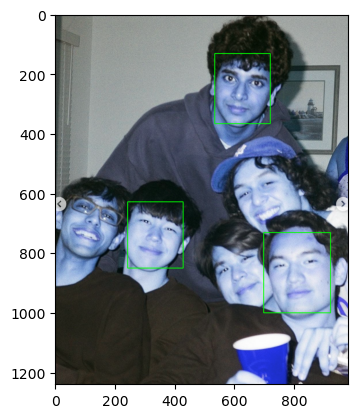

In [16]:
read_file_display('./test_images/sidhu3.png')